In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
actions = [
    'hungry',
    'sleepy',
    'Language_translation', 
    'go_anywhere', 
    'hurts'
]


data = np.concatenate([
    np.load('dataset/kmj/seq_hungry_1725455631.npy'),
    np.load('dataset/kmj/seq_hungry_1725456881.npy'),
    np.load('dataset/jku/seq_hungry_1725456584.npy'),
    np.load('dataset/jku/seq_hungry_1725456242.npy'),
    np.load('dataset/kmj/seq_sleepy_1725455631.npy'),
    np.load('dataset/kmj/seq_sleepy_1725456881.npy'),
    np.load('dataset/jku/seq_sleepy_1725456242.npy'),
    np.load('dataset/jku/seq_sleepy_1725456584.npy'),
    np.load('dataset/kmj/seq_Language_translation_1725455631.npy'),
    np.load('dataset/kmj/seq_Language_translation_1725456881.npy'),
    np.load('dataset/jku/seq_Language_translation_1725456242.npy'),
    np.load('dataset/jku/seq_Language_translation_1725456584.npy'),
    np.load('dataset/kmj/seq_go_anywhere_1725455631.npy'),
    np.load('dataset/kmj/seq_go_anywhere_1725456881.npy'),
    np.load('dataset/jku/seq_go_anywhere_1725456242.npy'),
    np.load('dataset/jku/seq_go_anywhere_1725456584.npy'),
    np.load('dataset/kmj/seq_hurts_1725455631.npy'),
    np.load('dataset/kmj/seq_hurts_1725456881.npy'),
    np.load('dataset/jku/seq_hurts_1725456242.npy'),
    np.load('dataset/jku/seq_hurts_1725456584.npy')
], axis=0)

data.shape

(22737, 40, 100)

In [3]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(22737, 40, 99)
(22737,)


In [4]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(22737, 5)

In [5]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(20463, 40, 99) (20463, 5)
(2274, 40, 99) (2274, 5)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

C:\Users\kyle0\Desktop\mohang\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        41,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,229 (172.77 KB)

 Trainable params: 44,229 (172.77 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model.keras', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
635/640 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3513 - loss: 27.8225
Epoch 1: val_acc improved from -inf to 0.59719, saving model to models/model.keras
640/640 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.3522 - loss: 27.7192 - val_acc: 0.5972 - val_loss: 2.9392 - learning_rate: 0.0010
Epoch 2/200
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.5355 - loss: 4.2816
Epoch 2: val_acc improved from 0.59719 to 0.73395, saving model to models/model.keras
640/640 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - acc: 0.5356 - loss: 4.2807 - val_acc: 0.7339 - val_loss: 0.9651 - learning_rate: 0.0010
Epoch 3/200
639/640 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.7848 - loss: 0.8067
Epoch 3: val_acc improved from 0.73395 to 0.86544, saving model to models/model.keras
640/640 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - acc: 0.7849 - loss: 0.8064 - val_acc: 0.8654 - val_loss: 0.5128 - learning_rate: 0.0010
Epoch 4/200
639/640 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.8649 - loss: 0.5460
Epoch 4: val_ac

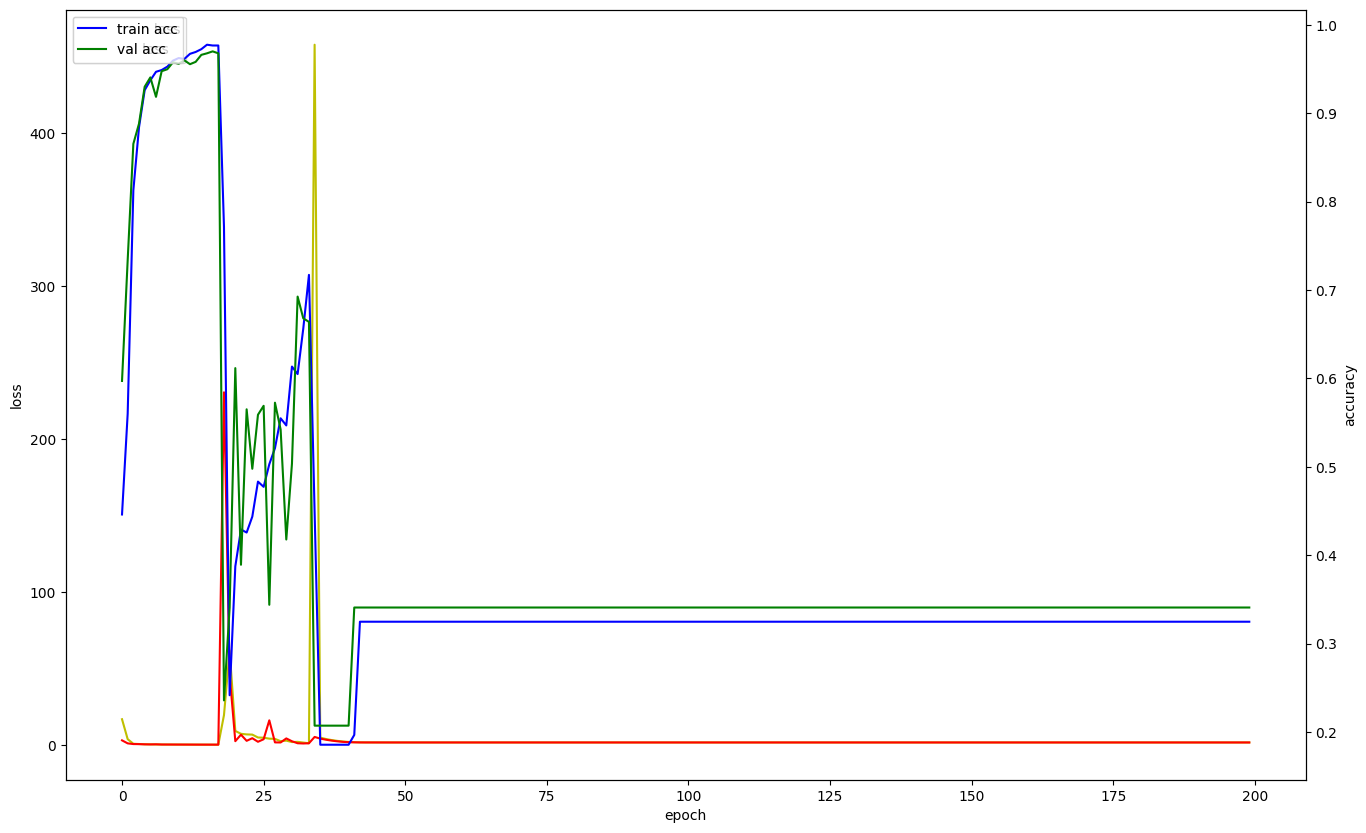

In [8]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [9]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.keras')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


array([[[1880,    2],
        [  24,  368]],

       [[1763,   40],
        [  13,  458]],

       [[1952,    6],
        [   0,  316]],

       [[1489,   10],
        [  11,  764]],

       [[1944,   10],
        [  20,  300]]], dtype=int64)